The $k$-Nearest Neighbor ($k$-nn) rule, takes into consideration the similarity of objects in order to classify them. For example, the species of a dog can be determined by its characteristics. The color of the fur, the size, the length of the jaw, etc., will all be within a certain range for a given species.

This theory of similar characteristics comes in handy when handling numerical data. When graphed this data should be represented in clusters. The data points of each classification (e.g. dog breed) will be near each other when graphed. **Note**: The dimensions data points will be determined by the number of attributes in your data-set.

Below I will demonstrate how clusters of 2-dimensional data would look with the help of sk-learn's [make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) tool and use this data to demonstrate the $k$-nn rule.

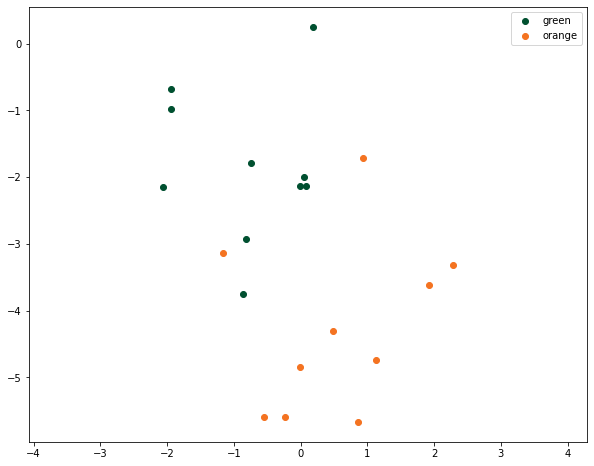

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

X, y = datasets.make_blobs(n_samples=20, centers=2, center_box =(-5.0, 5.0))

plt.figure(figsize=(10,8))
plt.scatter(X[y==0, 0], X[y==0, 1], c="#005030")
plt.scatter(X[y==1, 0], X[y==1, 1], c="#f47321")

plt.axis('equal')
plt.legend(['green', 'orange'])

plt.show()

We now have 2 clusters of data. One classified as green and the other classified as orange. This data will be considered our training data, meaning that the classification of future data points will be determined with these 'training points'. 

Next I will plot a random point (within the range of the current values) we will try to classify it.

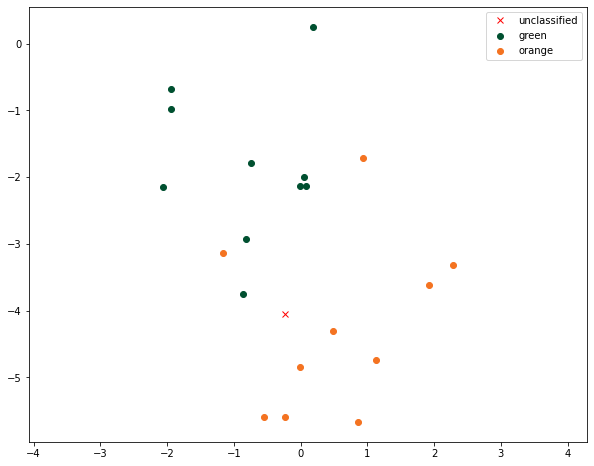

In [2]:
from random import uniform

# get all x and y values in seperate lists
x_values = [x for x,y in X]
y_values = [y for x,y in X]

# find min and max values for each x and y coordinates
x_min, x_max = min(x_values), max(x_values)
y_min, y_max = min(y_values), max(y_values)

# produce a random point within the range found above
rand_point = rand_x, rand_y = uniform(x_min, x_max), uniform(y_min, y_max)

# plot data
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(X[y==0, 0], X[y==0, 1], c="#005030")
ax.scatter(X[y==1, 0], X[y==1, 1], c="#f47321")
ax.plot(rand_x, rand_y, 'rx')

plt.axis('equal')
ax.legend(['unclassified', 'green', 'orange'])
 
plt.show()

Let us call the unclassified point $X$. $X$'s nearest neighbor is the training point that is closest to it geometrically. This is where the distance formula you learned in high school comes in handy! [What is it again?](https://lmgtfy.app/?q=distance+formula)

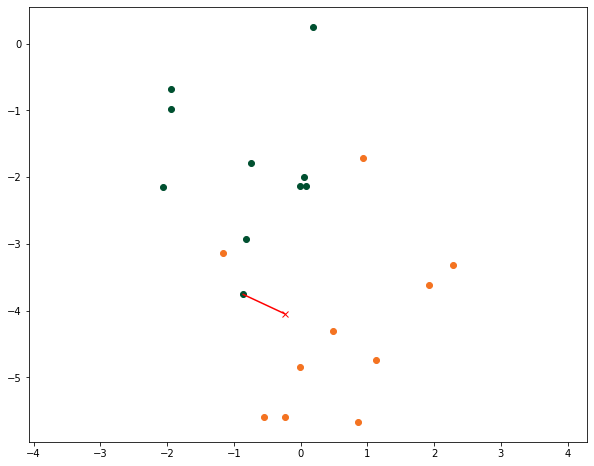

In [3]:
from math import sqrt

nearest = min(X, key=lambda x: sum((x - rand_point)**2))
        
# plot data
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(X[y==0, 0], X[y==0, 1], c="#005030")
ax.scatter(X[y==1, 0], X[y==1, 1], c="#f47321")
ax.plot(rand_x, rand_y, 'rx')
ax.plot([rand_point[0], nearest[0]], [rand_point[1], nearest[1]], 'r-')

plt.axis('equal')

plt.show()

Above you can see a line drawn to the unclassified point's nearest neighbor.

The $k$ in $k$-nn represents the number of nearest neighbors you want to use to classify points (The graph above demostrates 1-nn). The presumed classification of $X$ is the classification that most of it's $k$ neighbors have. For example, if using a 3-NN techique and 2 of the nearest neighbors are orange and the last 1 is green, the final classification of $X$ would be orange.

3-NN will be demonstrated below.

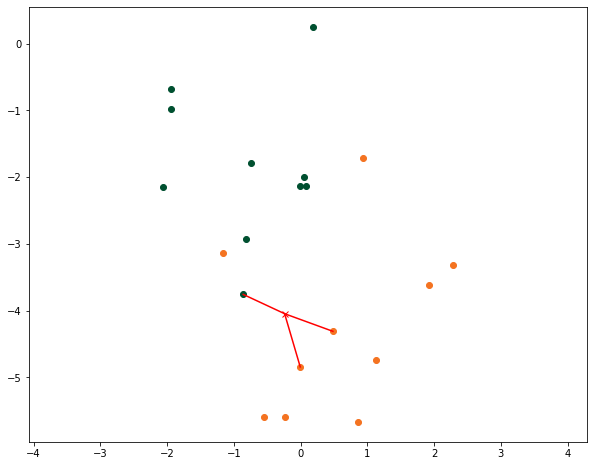

In [4]:
def knn(test_data, point, k=3):
    test_data.sort(key=lambda x: sum((x - point)**2))
    return test_data[:k]
        
neighbors = knn(list(X), rand_point, 3)

# plot data
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(X[y==0, 0], X[y==0, 1], c="#005030")
ax.scatter(X[y==1, 0], X[y==1, 1], c="#f47321")
ax.plot(rand_x, rand_y, 'rx')
for point in neighbors:
    ax.plot([rand_point[0], point[0]], [rand_point[1], point[1]], 'r-')

plt.axis('equal')

plt.show()